# Project 2 Modeling

### EDA

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
ames_csv = "./train.csv"
ames = pd.read_csv(ames_csv)
test_csv = "./test.csv"
test_set = pd.read_csv(test_csv)

In [3]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [5]:
ames.shape

(2051, 81)

In [6]:
ames.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [8]:
## at first I tried to remove instances of NaN from my model, which involved dropping a few columns and all NaN values
# but then I realized you can't drop NaN from the test_set so this notebook is a hard reset

In [9]:
# my new plan for dealing with NaN is to turn all object NaNs into 0 and all integer NaNs into the mean of the column
# I think this will be acceptable because high counts of NaN make me think that the variable is not a very strong
# predictor, and I plan on using a lasso or elastic net regression. Low columns with low NaN counts will ideally be 
# drowned out by the rest of the legitimate data

#### New plan:
- Change object NaNs to 0
- Change int NaNs to column mean

In [10]:
# standardizing the train set and test set dummies 

object_columns = ["Pool QC", "Fence", "Misc Feature", "Alley", "MS Zoning", "Street", "Lot Shape", "Land Contour", "Utilities", "Lot Config", "Land Slope",
                "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl",
                "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Exter Qual", "Exter Cond", "Foundation", 
                "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Heating", "Heating QC", 
                "Central Air", "Electrical", "Kitchen Qual", "Functional" , "Fireplace Qu", "Garage Type", "Garage Finish",
                "Garage Qual", "Garage Cond", "Paved Drive","Sale Type"]

test_set.fillna("NAN", inplace=True)
ames.fillna("NAN", inplace=True)

# thanks to Mike T. for the assist on this one

for i in object_columns:
    testlist = list(test_set[i].unique())
    ameslist = list(ames[i].unique())
    combinedlist = set(ameslist + testlist)
    test_set[i] = pd.Categorical(test_set[i], categories=combinedlist)
    ames[i] = pd.Categorical(ames[i], categories=combinedlist)

In [11]:
ames.replace("NAN", np.nan, inplace=True)
test_set.replace("NAN", np.nan, inplace=True)

In [12]:
test_set = pd.get_dummies(test_set)

In [13]:
ames = pd.get_dummies(ames)
# it has come to my attention that creating dummies will automatically set all object NaNs to 0

In [14]:
ames.shape

(2051, 317)

In [15]:
object_columns = ["Pool QC", "Fence", "Misc Feature", "Alley", "MS Zoning", "Street", "Lot Shape", "Land Contour", "Utilities", "Lot Config", "Land Slope",
                "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl",
                "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Exter Qual", "Exter Cond", "Foundation", 
                "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Heating", "Heating QC", 
                "Central Air", "Electrical", "Kitchen Qual", "Functional" , "Fireplace Qu", "Garage Type", "Garage Finish",
                "Garage Qual", "Garage Cond", "Paved Drive","Sale Type"]

integer_columns = [x for x in ames.columns if x != object_columns]


In [16]:
for i in integer_columns:
    ames[i] = ames[i].fillna(ames[i].mean())

In [17]:
# the NaNs have been eradicated


In [18]:
# generating interactions
poly = PolynomialFeatures(include_bias=False)
target = "SalePrice"
features = [x for x in ames.columns if x != target]
ames_poly = poly.fit_transform(ames[features])
print(ames_poly.shape)
ames_poly_df = pd.DataFrame(ames_poly, columns=poly.get_feature_names(features))

(2051, 50402)


In [19]:
# splitting and standardizing
y = ames[target]
X_train, X_test, y_train, y_test = train_test_split(ames_poly_df, y)

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

In [20]:
X_train

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLD^2,Sale Type_ConLD Sale Type_VWD,Sale Type_ConLD Sale Type_Con,Sale Type_ConLD Sale Type_New,Sale Type_VWD^2,Sale Type_VWD Sale Type_Con,Sale Type_VWD Sale Type_New,Sale Type_Con^2,Sale Type_Con Sale Type_New,Sale Type_New^2
907,2757.0,906382050.0,60.0,73.0000,8760.0,7.0,5.0,2006.0,2006.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1202,2166.0,907420060.0,60.0,64.0000,8333.0,7.0,5.0,2006.0,2006.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
753,965.0,916403250.0,80.0,125.0000,14419.0,7.0,5.0,1987.0,1989.0,310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,2019.0,903233140.0,45.0,51.0000,6120.0,7.0,8.0,1929.0,2001.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1116,1974.0,902100010.0,30.0,60.0000,6978.0,5.0,7.0,1926.0,1980.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1540,2502.0,533127080.0,60.0,69.0552,14541.0,8.0,7.0,1993.0,1993.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
762,824.0,906380050.0,60.0,68.0000,10769.0,8.0,5.0,2007.0,2007.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,1853.0,533244040.0,60.0,106.0000,8413.0,8.0,5.0,1998.0,1998.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1946,671.0,535403190.0,20.0,62.0000,8010.0,6.0,9.0,1958.0,2007.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1863,62.0,528358010.0,20.0,59.0000,10593.0,7.0,5.0,1996.0,1996.0,338.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# lasso set up
lcv = LassoCV(max_iter=10000)
lcv.fit(Xs_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [21]:
print(lcv.alpha_)
lcv_alpha = lcv.alpha_

718.6394622558284


In [22]:
lcv_score = cross_val_score(lcv, Xs_train, y_train)

In [23]:
lcv_score.mean()

0.8656527889309458

In [57]:
lcv_internal_score = lcv.score(Xs_test, y_test)

In [58]:
lcv_internal_score

0.7536184515769603

In [24]:
# finalizing the test set
integer_columns.remove("SalePrice")
for i in integer_columns:
    test_set[i] = test_set[i].fillna(test_set[i].mean())

In [25]:
test_set_poly = poly.transform(test_set)

In [26]:
test_set_poly_df = pd.DataFrame(test_set_poly, columns=poly.get_feature_names(features))

In [27]:
# standardizing test set
s_test_set = ss.transform(test_set_poly_df)

In [28]:
# predicting
y_hat = lcv.predict(s_test_set)
y_hat.shape

(879,)

In [29]:
the_id = test_set["Id"]
sub = pd.DataFrame()
sub["Id"] = the_id
sub["SalePrice"] = y_hat
sub.set_index(["Id"], inplace=True)

In [30]:
sub.to_csv("./sub_with_nans")

### Now with an elastic net to see if that's better

In [59]:
encv = ElasticNetCV()
encv.fit(Xs_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [60]:
print(encv.alpha_)
print(encv.l1_ratio_)

134.04111354042848
0.5


In [61]:
y_hat_en = encv.predict(s_test_set)

In [62]:
the_id = test_set["Id"]
sub_en = pd.DataFrame()
sub_en["Id"] = the_id
sub_en["SalePrice"] = y_hat_en
sub_en.set_index(["Id"], inplace=True)

In [63]:
sub_en.to_csv("./sub_en")

In [64]:
# It isnt :O

### Interpreting

In [65]:
# visualizing the coefficients
lasso_coefs = lcv.coef_
alphapd = pd.DataFrame(np.absolute(lasso_coefs))
alphapd.set_index(ames_poly_df.columns, inplace=True)

In [66]:
alphapd.sort_values(by=0, ascending=False, inplace=True)

In [67]:
alphapd.head(20)

,0
Overall Qual Gr Liv Area,10337.962111
Overall Qual Total Bsmt SF,9183.426205
Overall Cond Gr Liv Area,7855.617776
Year Built Year Remod/Add,5524.947342
Overall Qual Misc Feature_Elev,4539.580238
Overall Qual Garage Area,4130.792263
Gr Liv Area Functional_Typ,3837.802479
Overall Qual 1st Flr SF,3591.126540
Year Built,3375.191911
Misc Val Neighborhood_Edwards,3120.230141


In [68]:
y_hat.mean()

179898.44166034335

In [69]:
np.count_nonzero(alphapd)

462

In [70]:
alpha_plot = alphapd.iloc[0:10]

In [71]:
alpha_plot.rename(index={0:"Predictor"})

,0
Overall Qual Gr Liv Area,10337.962111
Overall Qual Total Bsmt SF,9183.426205
Overall Cond Gr Liv Area,7855.617776
Year Built Year Remod/Add,5524.947342
Overall Qual Misc Feature_Elev,4539.580238
Overall Qual Garage Area,4130.792263
Gr Liv Area Functional_Typ,3837.802479
Overall Qual 1st Flr SF,3591.126540
Year Built,3375.191911
Misc Val Neighborhood_Edwards,3120.230141


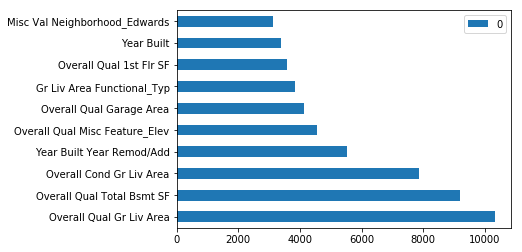

In [72]:
alpha_plot.plot(kind="barh")